In [4]:
# Import relevant libraries
import json
import pymongo
import pandas as pd
import re
import matplotlib.pyplot as plt

In [5]:
# Connect to MongoDB
client = pymongo.MongoClient('mongodb://localhost:27017')

# MongoDB database name
db = client["salesdb"]

# MongoDB collection name
collection = db["sales"]
dataset = list(collection.find())
first_data = ""

if len(dataset) > 0:
    first_data = dataset[0]
    print(first_data)
else:
    print("No data found in the dataset.")

{'_id': ObjectId('5bd761dcae323e45a93ccfec'), 'saleDate': datetime.datetime(2017, 12, 3, 18, 39, 48, 253000), 'items': [{'name': 'backpack', 'tags': ['school', 'travel', 'kids'], 'price': Decimal128('127.59'), 'quantity': 3}, {'name': 'notepad', 'tags': ['office', 'writing', 'school'], 'price': Decimal128('17.6'), 'quantity': 4}, {'name': 'binder', 'tags': ['school', 'general', 'organization'], 'price': Decimal128('18.67'), 'quantity': 2}, {'name': 'pens', 'tags': ['writing', 'office', 'school', 'stationary'], 'price': Decimal128('60.56'), 'quantity': 3}, {'name': 'notepad', 'tags': ['office', 'writing', 'school'], 'price': Decimal128('28.41'), 'quantity': 1}, {'name': 'envelopes', 'tags': ['stationary', 'office', 'general'], 'price': Decimal128('15.28'), 'quantity': 7}, {'name': 'laptop', 'tags': ['electronics', 'school', 'office'], 'price': Decimal128('1259.02'), 'quantity': 3}], 'storeLocation': 'London', 'customer': {'gender': 'M', 'age': 40, 'email': 'dotzu@ib.sh', 'satisfaction':

In [47]:
# Create an empty list to store the extracted values
purchase_methods = []
order_id = []

# Iterate over the dataset and extract the values
for data in dataset:
    order_id.append(data['_id'])
    purchase_methods.append(data['purchaseMethod'])

# Create a DataFrame from the extracted values
df = pd.DataFrame({"_id":order_id, "purchaseMethod": purchase_methods})

# Print the DataFrame
print(df.tail())

                           _id purchaseMethod
4995  5bd761deae323e45a93ce366       In store
4996  5bd761deae323e45a93ce36c       In store
4997  5bd761deae323e45a93ce36f         Online
4998  5bd761deae323e45a93ce36b       In store
4999  5bd761deae323e45a93ce36d       In store


In [35]:
# Install kmodes for clustering
!pip install kmodes

In [48]:
# Import necessary libraries
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7180.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6583.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

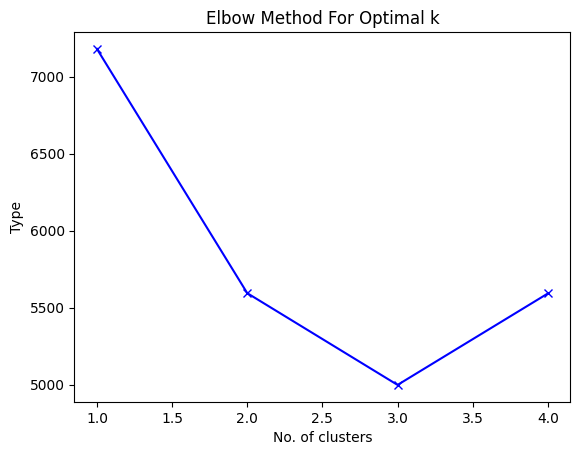

In [49]:
#Using Elbow method 
cost = []
K = range(1,5)

#Iterate over cluster numbers one through 4
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Type')
plt.title('Elbow Method For Optimal k')
plt.show()

In [50]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4997.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6582.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 4997.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5593.0
Best run was number 1


array([2, 2, 1, ..., 0, 2, 2], dtype=uint16)

In [51]:
# Insert the cluster column to the DataFrame
df.insert(0, "Cluster", clusters, True)

In [52]:
# Display the head of 10 records where the cluster is 0
df[df['Cluster']==0].head(10)

,Cluster,_id,purchaseMethod
3,0,5bd761dcae323e45a93ccfe8,Online
6,0,5bd761dcae323e45a93ccfef,Online
11,0,5bd761dcae323e45a93ccff5,Online
22,0,5bd761dcae323e45a93cd000,Online
23,0,5bd761dcae323e45a93ccffe,Online
26,0,5bd761dcae323e45a93ccff6,Online
29,0,5bd761dcae323e45a93cd002,Online
32,0,5bd761dcae323e45a93cd00a,Online
35,0,5bd761dcae323e45a93cd00d,Online
38,0,5bd761dcae323e45a93cd012,Online


In [53]:
# Display the head of 10 records where the cluster is 1
df[df['Cluster']==1].head(10)

,Cluster,_id,purchaseMethod
2,1,5bd761dcae323e45a93ccfe9,Phone
14,1,5bd761dcae323e45a93ccff7,Phone
17,1,5bd761dcae323e45a93ccff2,Phone
18,1,5bd761dcae323e45a93ccff8,Phone
28,1,5bd761dcae323e45a93cd005,Phone
39,1,5bd761dcae323e45a93cd010,Phone
60,1,5bd761dcae323e45a93cd024,Phone
63,1,5bd761dcae323e45a93cd028,Phone
66,1,5bd761dcae323e45a93cd02e,Phone
78,1,5bd761dcae323e45a93cd036,Phone


In [54]:
# Display the head of 10 records where the cluster is 2
df[df['Cluster']==2].head(10)

,Cluster,_id,purchaseMethod
0,2,5bd761dcae323e45a93ccfec,In store
1,2,5bd761dcae323e45a93ccfea,In store
4,2,5bd761dcae323e45a93ccfeb,In store
5,2,5bd761dcae323e45a93ccfed,In store
7,2,5bd761dcae323e45a93ccfee,In store
8,2,5bd761dcae323e45a93ccff0,In store
9,2,5bd761dcae323e45a93ccff4,In store
10,2,5bd761dcae323e45a93ccff3,In store
12,2,5bd761dcae323e45a93ccff1,In store
13,2,5bd761dcae323e45a93ccffa,In store
